In [19]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics

In [20]:
# Set filepath

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/BL/'
# experimentName = "RS"

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/NS/'
# experimentName = "NS"

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/GRi/'
# experimentName = "GRi"

repository='/home/ebb505/ARE_Project/are-logs/PPSN/GRe/'
experimentName = "GRe"

filename='norepmorphdesc.csv'

In [21]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repository):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders found:", len(folders))

Folders found: 15


In [22]:
# Get information from files
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)

In [23]:
elementX = 4
elementY = 5
xVariable = "Wheels"
yVariable = "Sensors"
rangeX = [0,1,2,3,4,5,6,7,8,9,10] 
posX = np.arange(0,1.1,0.1) # Why are these offsets necessary?

# elementX = 1
# elementY = 2
# xVariable = "Width"
# yVariable = "Depth"
# rangeX = [0,0.05,0.1,0.15,0.2,0.25] 
# posX = np.arange(0,1.1,0.2) # Why are these offsets necessary?

population = 40
#replicates = len(my_replicates)
replicates = 15
#evaluations = len(my_replicates[0])
evaluations = 20000
features = len(my_replicates[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  15 Evaluations:  20000 Features:  6 Generations:  500


In [24]:
# Process data
repRes = np.array([[float(y) for y in x] for x in my_replicates[0]])
for rep in range(1,replicates,1):
    repRes = np.concatenate((repRes, np.array([[float(y) for y in x] for x in my_replicates[rep]])),axis=0)
    print(len(repRes))
print("Done!")

19932
29924
39404
49263
58867
68388
77874
87118
96655
106786
116532
126123
135910
145561
Done!


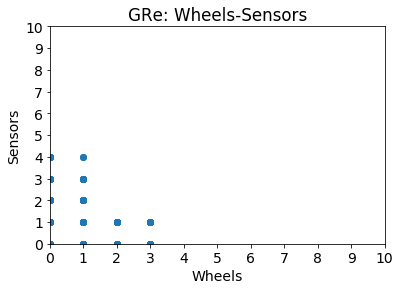

In [25]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)
# Plot stuff
plt.figure(0)
plt.xlabel(xVariable)
plt.ylabel(yVariable)
#plt.scatter(listMat[:,0],listMat[:,1],c=listMat[:,2])
plt.scatter(repRes[:,elementX],repRes[:,elementY])
axes = plt.gca()
axes.set_xlim([0,1.0])
axes.set_ylim([0,1.0])
axes = plt.gca()
title = experimentName + ': ' + xVariable + '-' + yVariable
plt.title(title)

plt.xticks(posX,rangeX)
plt.yticks(posX,rangeX)


plt.savefig(repository+experimentName+xVariable+yVariable+'ScatterPop.png', dpi=200)

In [20]:
print(dat[4])

[4.       0.916667 0.875    0.916667 0.1      0.1      0.305773]
